In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/kaggle/input/logistic-breast-cancer/breast_cancer.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


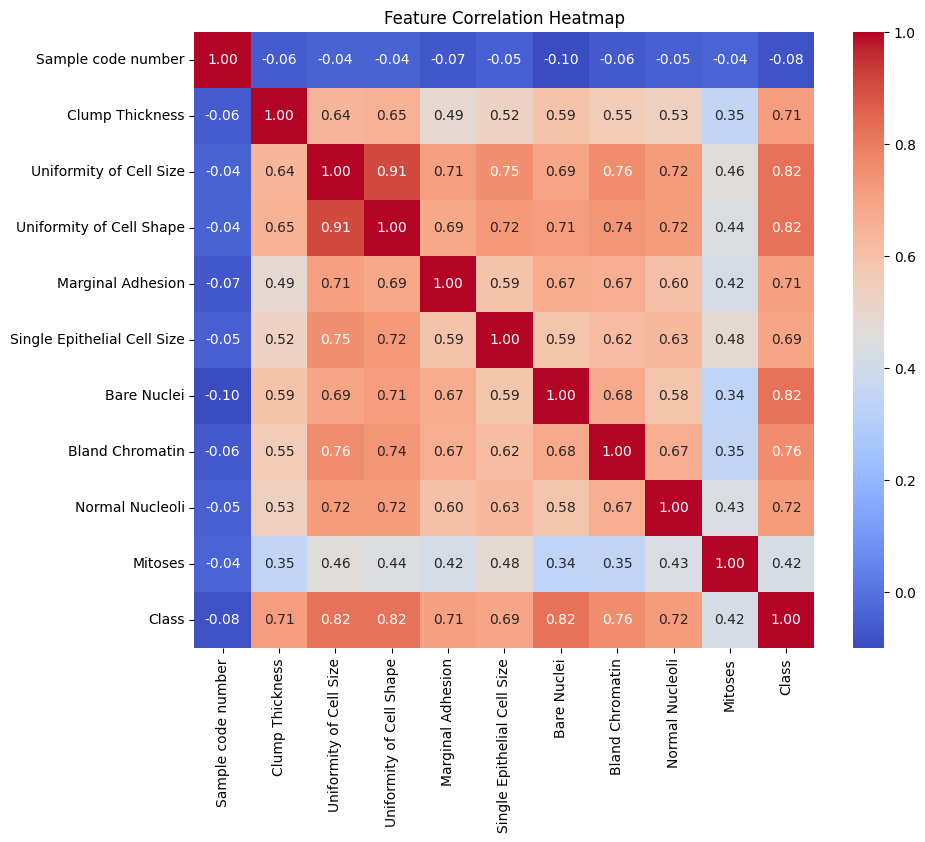

In [12]:
plt.figure(figsize=(10, 8))  # Optional: Set figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Model Creation & Tuning

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer()),        
    ('scaler', StandardScaler()),      
    ('logreg', LogisticRegression())      
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100]})

# Prediction & Evaluation

In [16]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = grid.predict(X_test)

print(grid.best_params_['logreg__C'])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

10
Accuracy: 0.9562043795620438
Classification Report:
               precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



# Confusion Matrix

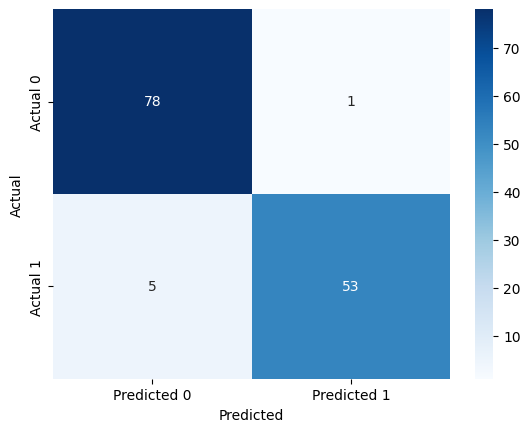

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
prediction = grid.predict([[5,1,1,1,2,1,3,1,10]])
if prediction[0] == 4:
    print("Tumour")
else:
    print("Nontumour")


Nontumour
